<a href="https://colab.research.google.com/github/Shrutakeerti/AI-ML-assignments/blob/main/Assignement10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Enter path to diabetes.csv: /content/diabetes(in).csv


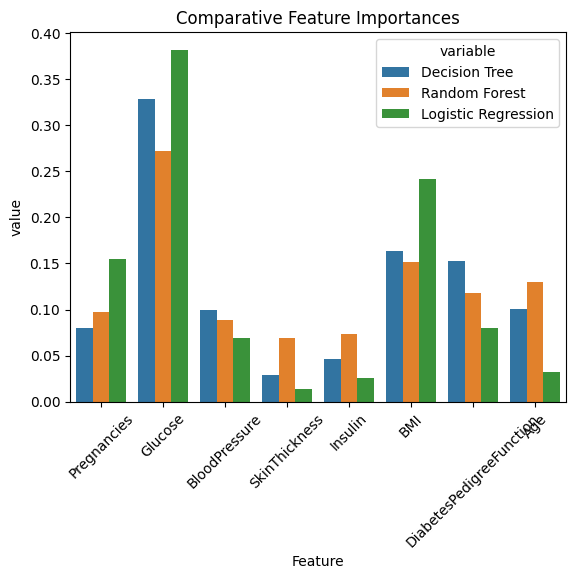

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Load dataset
data = pd.read_csv(input("Enter path to diabetes.csv: "))
X, y = data.drop(columns='Outcome'), data['Outcome']

# Split and scale data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train models
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000)
}

for name, model in models.items():
    model.fit(X_train, y_train)

# Feature importances
importances = {
    'Decision Tree': models['Decision Tree'].feature_importances_,
    'Random Forest': models['Random Forest'].feature_importances_,
    'Logistic Regression': np.abs(models['Logistic Regression'].coef_[0])
}

# Normalize importances and create comparison DataFrame
comparison = pd.DataFrame({name: imp / np.sum(imp) for name, imp in importances.items()}, index=X.columns).reset_index().rename(columns={'index': 'Feature'})

# Plot feature importances
sns.barplot(x='Feature', y='value', hue='variable', data=pd.melt(comparison, id_vars='Feature'))
plt.xticks(rotation=45)
plt.title('Comparative Feature Importances')
plt.show()
